# Matplotlib Homework - The Power of Plots - Pymaceuticals

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file_mouse = "mouse_drug_data.csv"
file_clinicaltrial = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(file_mouse)
df_clinical = pd.read_csv(file_clinicaltrial)

# Combine the data into a single dataset
trial_df = pd.merge(df_mouse,df_clinical, on='Mouse ID')

# Display the data table for preview
trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Tumor Response to Treatment 

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#covert to DF and preview
tumor_df = trial_df.groupby(['Drug', 'Timepoint']) ['Tumor Volume (mm3)']
avg_tumor_df = tumor_df.mean()

tumor_sem_df = pd.DataFrame(avg_tumor_df)

#Preview dataframe
tumor_sem_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sem_df = tumor_sem_df.reset_index()

tumor_sem_df_reformatted = tumor_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_sem_df_reformatted.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


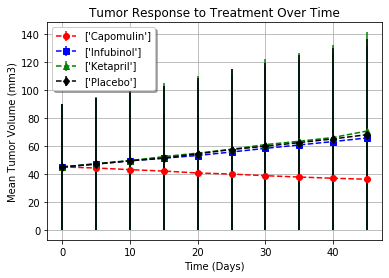

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')


<Figure size 432x288 with 0 Axes>

In [6]:
#Generate the Plot (with Error Bars)

drug_list = tumor_sem_df_reformatted.index

drugs= ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["s","b"], "Ketapril":["^","g"], "Placebo":["d","k"]}
          
#format and label plot 
plt.figure()
plt.title("Tumor Response to Treatment Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid(True)

#loop
for drug in drugs:
   plt.errorbar(drug_list, tumor_sem_df_reformatted[drug],tumor_sem_df_reformatted[drug], 
                linestyle = "--",label=[drug],color = marker[drug][1],marker=marker[drug][0])


plt.legend(loc= 'upper left', shadow=True)
plt.show()
print(drug_list)

#Save the Figure
plt.savefig("Tumor Response to Treatment")


In [7]:
# Show the Figure 
plt.show()

Metastatic Response to Treatment 

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = trial_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_metastatic_df = metastatic_df.mean()

# Convert to DataFrame
metastatic_response_df = pd.DataFrame(avg_metastatic_df)

# Preview DataFrame
metastatic_response_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem_errors = metastatic_df.sem()

# Convert to DataFrame
metastatic_sem_errors_df = pd.DataFrame(metastatic_sem_errors)

# Preview DataFrame
metastatic_sem_errors_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [10]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_df = metastatic_response_df.reset_index()
metastatic_sem_df_reformatted = metastatic_response_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
metastatic_sem_df_reformatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


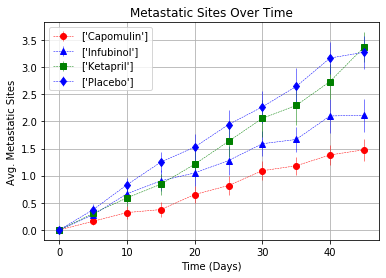

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)

drug_list = [('Capomulin','o','r'),('Infubinol','^','b'),('Ketapril','s','g'),('Placebo','d','b')]

#loop
for drug,marker,colors in drug_list:
    ste = metastatic_sem_errors[drug]
    tumor_treatment_plt = plt.errorbar(metastatic_sem_df_reformatted.index,metastatic_sem_df_reformatted[drug],ste,
                                       fmt=marker,ls='--',label=[drug],color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Metastatic Sites Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Avg. Metastatic Sites')
plt.grid()

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("Metastatic Sites Over Time.png")


Survival Rates 

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped = trial_df.groupby(['Drug','Timepoint'])['Mouse ID']
mouse_df = mouse_grouped.count()

# Convert to DataFrame
mouse_df = pd.DataFrame(data = mouse_df)
mouse_df = mouse_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mouse_df.head(10)


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_df = mouse_df.reset_index()
mouse_df_pivot = mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
mouse_df_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
# Generate the Plot (Accounting for percentages)

for drug,marker,colors in drug_list:
    mouse_summary = mouse_df_pivot[drug][0]
    survival_rate = (mouse_df_pivot[drug]/mouse_summary)*100
    survival_treatment_plt = plt.plot(mouse_df_pivot.index,survival_rate,
                                       marker=marker,ls='--',label=[drug],color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Mouse Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("Mouse Survival Over Time.png")
# Show the Figure
plt.show()

ValueError: too many values to unpack (expected 3)

Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percentage_change = (tumor_sem_df_reformatted.iloc[-1]/(tumor_sem_df_reformatted.iloc[0])-1)*100

# Display the data to confirm
percentage_change.head(10)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

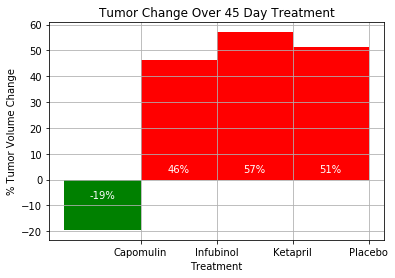

In [16]:
# Store all Relevant Percent Changes into a Tuple
passingDrug = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passingDrug.map({True:'g',False:'r'}))

x_axis = np.arange(len(drugs))
plt.xlabel("Treatment")
plt.ylabel('% Tumor Volume Change')
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
plt.xticks(x_axis, drugs)

# Use functions to label the percentages of changes
def labelplot(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
labelplot(change_plt)

# Save the Figure
plt.savefig('Tumor_Change_Over_45days_Treatment.png')

# Show the Figure
plt.show()